In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
titanic.count(axis=0)

survived    714
pclass      714
sex         714
age         714
dtype: int64

In [39]:
titanic = pd.read_csv('seaborn-data/titanic.csv')
titanic = titanic[['survived','pclass','sex','age']]
titanic = titanic.dropna(axis=0)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [45]:
x = titanic.drop('survived',axis=1)
y = titanic['survived']

In [85]:
## Modélisation

In [46]:
from sklearn.model_selection import train_test_split

In [49]:
Xtrain , Xtest , ytrain , ytest = train_test_split(x,y,test_size=0.2)
print('Donnée d\'entrainement',Xtrain.shape)
print('Donnée de test',Xtest.shape)

Donnée d'entrainement (571, 3)
Donnée de test (143, 3)


In [121]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold,ShuffleSplit,KFold
from sklearn.neighbors import KNeighborsClassifier

In [151]:
cv = KFold(4)
parm = {'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),parm,cv=cv)
grid.fit(Xtrain,ytrain)
grid.score(Xtrain,ytrain)

0.8143607705779334

In [152]:
model = grid.best_estimator_

In [153]:
model.score(Xtest,ytest)

0.7832167832167832

In [154]:
## Repêrtorions là ou sont les erreurs

In [155]:
from sklearn.metrics import confusion_matrix

In [156]:
confusion_matrix(ytest,model.predict(Xtest))

array([[78,  7],
       [24, 34]])

In [157]:
from sklearn.model_selection import learning_curve,StratifiedKFold

array([ 42,  85, 128, 171, 214, 256, 299, 342, 385, 428])

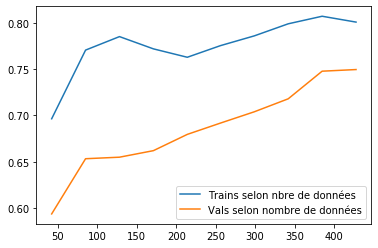

In [158]:
cv = StratifiedKFold(4)
N , trains ,vals = learning_curve(model,Xtrain,ytrain,train_sizes=np.linspace(0.1,1.0,10),cv=cv)
plt.plot(N,trains.mean(axis=1),label='Trains selon nbre de données')
plt.plot(N,vals.mean(axis=1),label ='Vals selon nombre de données')
plt.legend()
N

In [159]:
## Clairement qu'avec plus de données on peut améliorer le modèle

In [160]:
trains.mean(axis=1)

array([0.69642857, 0.77058824, 0.78515625, 0.77192982, 0.76285047,
       0.77539062, 0.78595318, 0.79897661, 0.80714286, 0.80081776])

In [ ]:
## best hyperparamètres : manhattan , n_neighbors = 6
## meilleur score : 0.76